**Datasets extraídos desde la página web**
- Fuente data de viajes: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

Abriendo un archivo de Taxi "amarillos" 2024 ENERO:

In [323]:
# Librerías
import pandas as pd
import numpy as np

import pyarrow.parquet as pq 
import os
from pandas import DataFrame
from dbfread import DBF

import folium
from folium.plugins import MarkerCluster
import webbrowser

import seaborn as sns
import matplotlib as mpl
import plotly.express as px

import matplotlib.pyplot as plt

# para eliminar warning en python
import warnings
warnings.simplefilter('ignore')


In [324]:
# Assumiendo que el archivo está en la carpeta
# Cambiar al directorio con el archivo
file_path = "C:/Users/56988/Desktop/NYdrive/yellow_tripdata_2024-01.parquet"
os.chdir("C:/Users/56988/Desktop/NYdrive/")

In [325]:
# Dataframe Taxis amarillos
df_amarillos = pd.read_parquet(file_path)

In [326]:
# Dataframe de 2 964 624 registros por 19 columnas
df_amarillos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [327]:
df_amarillos.tail(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN
2964623,1,2024-01-31 23:58:25,2024-02-01 00:13:30,NaN,8.10,NaN,None,138,75,0,32.40,7.75,0.5,7.29,6.94,1.0,55.88,NaN,NaN


In [328]:
# Cantidad de valores nulos en cada columna
null_counts = df_amarillos.isnull().sum()

In [329]:
null_counts

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64

**Archivo Taxis "verdes", ENERO, 2024:

En Nueva York, la principal diferencia entre los taxis amarillos y los verdes es la zona en la que pueden operar. Los taxis amarillos pueden recoger pasajeros en cualquier lugar de la ciudad, mientras que los taxis verdes, también conocidos como Boro Cabs, están limitados a recoger pasajeros principalmente fuera de Manhattan y no pueden hacerlo por debajo de la calle East 96th o West 110th ni en los aeropuertos.

In [330]:
# Assumiendo que el archivo está en la carpeta
# Cambiar al directorio con el archivo
file_path = "C:/Users/56988/Desktop/NYdrive/green_tripdata_2024-01.parquet"
os.chdir("C:/Users/56988/Desktop/NYdrive/")

In [331]:
# Dataframe Taxis verdes
df_verdes = pd.read_parquet(file_path)

In [332]:
df_verdes.head(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,1.0,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,1.0,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75


In [333]:
# 56 551 registros con 20 columnas
df_verdes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56551 entries, 0 to 56550
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56551 non-null  int32         
 1   lpep_pickup_datetime   56551 non-null  datetime64[us]
 2   lpep_dropoff_datetime  56551 non-null  datetime64[us]
 3   store_and_fwd_flag     53136 non-null  object        
 4   RatecodeID             53136 non-null  float64       
 5   PULocationID           56551 non-null  int32         
 6   DOLocationID           56551 non-null  int32         
 7   passenger_count        53136 non-null  float64       
 8   trip_distance          56551 non-null  float64       
 9   fare_amount            56551 non-null  float64       
 10  extra                  56551 non-null  float64       
 11  mta_tax                56551 non-null  float64       
 12  tip_amount             56551 non-null  float64       
 13  t

In [334]:
# Cantidad de valores nulos en cada columna
null_counts_verd = df_verdes.isnull().sum()

In [335]:
null_counts_verd

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        3415
RatecodeID                3415
PULocationID                 0
DOLocationID                 0
passenger_count           3415
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                56551
improvement_surcharge        0
total_amount                 0
payment_type              3415
trip_type                 3418
congestion_surcharge      3415
dtype: int64

Archivo FHV, ENERO, 2024:

In [336]:
# Assumiendo que el archivo está en la carpeta
# Cambiar al directorio con el archivo
file_path = "C:/Users/56988/Desktop/NYdrive/fhv_tripdata_2024-01.parquet"
os.chdir("C:/Users/56988/Desktop/NYdrive/")

In [337]:
# Dataframe FHV
df_fhv = pd.read_parquet(file_path)

In [338]:
df_fhv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290116 entries, 0 to 1290115
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1290116 non-null  object        
 1   pickup_datetime         1290116 non-null  datetime64[us]
 2   dropOff_datetime        1290116 non-null  datetime64[us]
 3   PUlocationID            274816 non-null   float64       
 4   DOlocationID            1107055 non-null  float64       
 5   SR_Flag                 0 non-null        float64       
 6   Affiliated_base_number  1290116 non-null  object        
dtypes: datetime64[us](2), float64(3), object(2)
memory usage: 68.9+ MB


In [339]:
df_fhv

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00053,2024-01-01 00:15:00,2024-01-01 02:13:00,NaN,NaN,NaN,B00014
1,B00111,2024-01-01 00:30:00,2024-01-01 02:37:00,NaN,NaN,NaN,B00111
2,B00112,2024-01-01 00:27:24,2024-01-01 01:12:05,NaN,14.0,NaN,B00112
3,B00112,2024-01-01 00:10:09,2024-01-01 00:25:39,NaN,133.0,NaN,B00112
4,B00112,2024-01-01 00:57:07,2024-01-01 01:05:04,NaN,14.0,NaN,B00112
...,...,...,...,...,...,...,...
1290111,B03492,2024-01-31 23:51:21,2024-01-31 23:57:09,NaN,14.0,NaN,B03492
1290112,B03492,2024-01-31 23:05:06,2024-01-31 23:20:13,NaN,21.0,NaN,B03492
1290113,B03492,2024-01-31 23:49:07,2024-02-01 00:16:25,NaN,14.0,NaN,B03492
1290114,B03505,2024-01-31 23:04:46,2024-01-31 23:18:22,NaN,76.0,NaN,B03505


In [340]:
# Cantidad de valores nulos en cada columna
null_counts_fhv = df_fhv.isnull().sum()

In [341]:
null_counts_fhv

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID              1015300
DOlocationID               183061
SR_Flag                   1290116
Affiliated_base_number          0
dtype: int64

Archivo FHVHV, ENERO, 2024:

In [342]:
# Assumiendo que el archivo está en la carpeta
# Cambiar al directorio con el archivo
file_path = "C:/Users/56988/Desktop/NYdrive/fhvhv_tripdata_2024-01.parquet"
os.chdir("C:/Users/56988/Desktop/NYdrive/")

In [343]:
# Dataframe FHVHV      28, 2 seg en abrir
df_fhvhv = pd.read_parquet(file_path)

In [344]:
df_fhvhv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19663930 entries, 0 to 19663929
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[us]
 4   on_scene_datetime     datetime64[us]
 5   pickup_datetime       datetime64[us]
 6   dropoff_datetime      datetime64[us]
 7   PULocationID          int32         
 8   DOLocationID          int32         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [345]:
df_fhvhv.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [346]:
df_fhvhv.tail(2)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
19663928,HV0003,B03404,B03404,2024-01-31 23:39:00,2024-01-31 23:41:03,2024-01-31 23:41:45,2024-01-31 23:52:40,246,163,1.57,...,1.62,2.75,0.0,4.62,8.54,N,N,N,N,N
19663929,HV0003,B03404,B03404,2024-01-31 23:54:54,2024-01-31 23:57:59,2024-01-31 23:58:25,2024-02-01 00:02:10,161,162,0.39,...,0.73,2.75,0.0,0.00,5.40,N,N,N,N,N


In [347]:
# Cantidad de valores nulos en cada columna
null_counts_fhvhv = df_fhvhv.isnull().sum()

In [348]:
null_counts_fhvhv

hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5218737
request_datetime              0
on_scene_datetime       5218737
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64

DATASET Vehículos de combustible alternativo en USA:

In [349]:
# Assumiendo que el archivo está en la carpeta
# Cambiar al directorio con el archivo
file_path = "C:/Users/56988/Desktop/NYdrive/DATASETORIGEN/Alternative Fuel Vehicles US.csv"
os.chdir("C:/Users/56988/Desktop/NYdrive/")

In [350]:
# Dataframe alternative fuel     28, 2 seg en abrir
df_alternative_fuel = pd.read_csv(file_path)

In [351]:
df_alternative_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            882 non-null    object 
 1   Model                               882 non-null    object 
 2   Model Year                          594 non-null    float64
 3   Manufacturer                        882 non-null    object 
 4   Fuel                                882 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   PHEV Total Range                    43 non-null     float64
 7   Alternative Fuel Economy City       169 non-null    float64
 8   Alternative Fuel Economy Highway    169 non-null    float64
 9   Alternative Fuel Economy Combined   262 non-null    float64
 10  Conventional Fuel Economy City      444 non-null    float64
 11  Conventional Fuel Economy Highway   444 non-n

In [352]:
df_alternative_fuel.fillna(0)

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,0.0,0.0,0.0,0.0,0.0,...,21.0,Auto,0,SI,3.5L,6.0,0,0,0,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,0.0,0.0,0.0,0.0,0.0,...,32.0,Auto,0,SI,2.0L,4.0,0,0,0,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,0.0,0.0,0.0,0.0,0.0,...,31.0,Auto,0,SI,2.0L,4.0,0,0,0,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,0.0,0.0,0.0,0.0,0.0,...,26.0,Auto,0,SI,2.0L,4.0,0,0,0,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,0.0,0.0,0.0,0.0,0.0,...,29.0,Auto,0,SI,2.0L,4.0,0,0,0,AWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,Street Sweeper,HSP,0.0,TYMCO,CNG - Compressed Natural Gas,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0.0,0,Cummins Westport L9N 8.9L Near Zero,0,0
878,Step Van,(various models),0.0,Utilimaster,Electric,0.0,0.0,0.0,0.0,0.0,...,0.0,Automatic,0,0,0,0.0,0,0,According to manufacturer: Various platforms a...,0
879,Transit Bus,CX45E,0.0,Van Hool,Electric,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0.0,Up to 56,Siemens ELFA2 Electric Drive System 360kW,According to manufacturer: 676 kWh battery sto...,0
880,Tractor,VNR Electric - Class 8,0.0,Volvo,Electric,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0.0,0,0,"According to manufacturer: 340kW; 455hp; 4,051...",0


In [353]:
df_alternative_fuel.columns

Index(['Category', 'Model', 'Model Year', 'Manufacturer', 'Fuel',
       'All-Electric Range', 'PHEV Total Range',
       'Alternative Fuel Economy City', 'Alternative Fuel Economy Highway',
       'Alternative Fuel Economy Combined', 'Conventional Fuel Economy City',
       'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'Transmission Type',
       'Transmission Make', 'Engine Type', 'Engine Size',
       'Engine Cylinder Count', 'Number of Passengers',
       'Heavy-Duty Power System', 'Notes', 'Drivetrain'],
      dtype='object')

In [354]:
# Suponiendo que hay un DataFrame con columna "columna_float" que contiene valores flotantes, y se rellena con 0 a su vez
df_alternative_fuel["Model Year"] = df_alternative_fuel["Model Year"].fillna(0).astype(int)


In [355]:
df_alternative_fuel["All-Electric Range"] = df_alternative_fuel["All-Electric Range"].fillna(0).astype(int)
df_alternative_fuel["PHEV Total Range"] = df_alternative_fuel["PHEV Total Range"].fillna(0).astype(int)
df_alternative_fuel["Alternative Fuel Economy City"] = df_alternative_fuel["Alternative Fuel Economy City"].fillna(0).astype(int)
df_alternative_fuel["Alternative Fuel Economy Highway"] = df_alternative_fuel["Alternative Fuel Economy Highway"].fillna(0).astype(int)
df_alternative_fuel["Alternative Fuel Economy Combined"] = df_alternative_fuel["Alternative Fuel Economy Combined"].fillna(0).astype(int)
df_alternative_fuel["Conventional Fuel Economy City"] = df_alternative_fuel["Conventional Fuel Economy City"].fillna(0).astype(int)
df_alternative_fuel["Conventional Fuel Economy Highway"] = df_alternative_fuel["Conventional Fuel Economy Highway"].fillna(0).astype(int)
df_alternative_fuel["Conventional Fuel Economy Combined"] = df_alternative_fuel["Conventional Fuel Economy Combined"].fillna(0).astype(int)
df_alternative_fuel["Engine Cylinder Count"] = df_alternative_fuel["Engine Cylinder Count"].fillna(0).astype(int)

In [356]:
df_alternative_fuel.tail(2)  # Drivetrain es Tren motriz

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
880,Tractor,VNR Electric - Class 8,0,Volvo,Electric,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,"According to manufacturer: 340kW; 455hp; 4,051...",NaN
881,Step Van,C-Series,0,Workhorse,Electric,0,0,0,0,0,...,0,Automatic,NaN,NaN,NaN,0,NaN,Workhorse Dual Axial Flux Interior Permanent M...,According to manufacturer: Up to 105 kWh batte...,NaN


<Axes: >

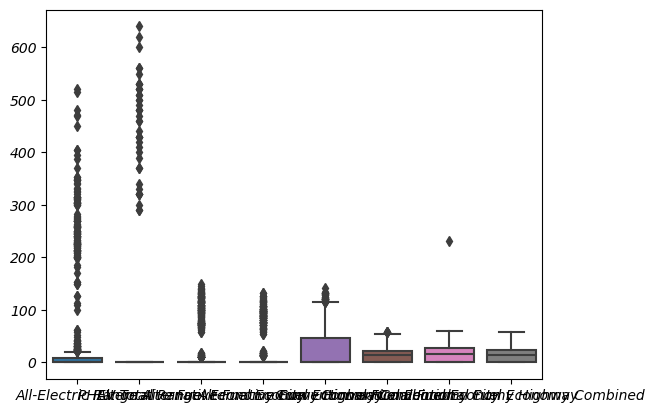

In [357]:
# DF 'df_alternative_fuel' como DataFrame
sns.boxplot(data=df_alternative_fuel[["All-Electric Range", "PHEV Total Range",
        "Alternative Fuel Economy City", "Alternative Fuel Economy Highway",
        "Alternative Fuel Economy Combined", "Conventional Fuel Economy City",
        "Conventional Fuel Economy Highway",
        "Conventional Fuel Economy Combined"]])

In [358]:
df_alternative_fuel.describe()

,Model Year,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Cylinder Count
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,1361.444444,41.764172,21.961451,16.207483,14.867347,22.573696,13.038549,15.145125,13.723356,2.775510
std,948.526184,98.124009,99.166256,37.496440,33.733473,38.940563,15.073437,17.581767,15.307758,2.903196
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.500000,17.000000,15.000000,4.000000
75%,2022.000000,8.000000,0.000000,0.000000,0.000000,46.000000,22.000000,28.000000,24.000000,6.000000
max,2022.000000,520.000000,640.000000,150.000000,133.000000,142.000000,59.000000,231.000000,59.000000,8.000000


**Gráfico de caja con bigotes con Automóviles con combustible alternativo:**
- Todo Eléctrico
- Auto híbrido
- Alternativo económico ciudad
- Alternativo económico autopista
- Alternativo económico combinado
- Convencional económico ciudad
- Convencional económico autopista
- Convencional económico combinado


**Diagrama de Caja con Bigotes para tipo de Vehículos según su tipo (2021-2022)**

*Variables:*

*Tipo de Combustible:* Todo Eléctrico, Híbrido Enchufable, Alternativo (Ciudad/Autopista/Combinado), Convencional (Ciudad/Autopista/Combinado),
distribución de su frecuencia (cuántos hay de cada tipo).

**Interpretación:**

El diagrama de caja con bigotes muestra la distribución de frecuencia de tipos de vehículos de los años 2021-2022. Cada caja representa la frecuencia, con las siguientes características:

**Fila "std":** Representa la desviación estándar para cada columna. Indica qué tan dispersos están los datos con respecto al promedio.
**Filas "min", "25%", "50%", "75%", "max":** Representan valores percentiles. Por ejemplo, en la columna "Year", el valor en "50%" (mediana) es 2021, lo que indica que la mitad de los vehículos son del año 2021 o más nuevos y la otra mitad es del 2021 o más antiguos.

**Fila "count":** Indica la cantidad de vehículos para los que se tienen datos en cada columna. En este caso, hay información para 882 automóviles en todas las columnas y
para "max": All-Electric Range: 520; PHEV Total Range: 640;	Alternative Fuel Economy City: 150;	Alternative Fuel Economy Highway: 133;	Alternative Fuel Economy Combined: 142;	Conventional Fuel Economy City: 59;	Conventional Fuel Economy Highway: 231;	Conventional Fuel Economy Combined: 59.
La variabilidad es muy alta por la std respecto de la media.

In [468]:
# Cantidad de valores nulos en cada columna
null_counts_alt_fuel = df_alternative_fuel.isnull().sum()

In [469]:
null_counts_alt_fuel

Category                                0
Model                                   0
Model Year                              0
Manufacturer                            0
Fuel                                    0
All-Electric Range                      0
PHEV Total Range                        0
Alternative Fuel Economy City           0
Alternative Fuel Economy Highway        0
Alternative Fuel Economy Combined       0
Conventional Fuel Economy City          0
Conventional Fuel Economy Highway       0
Conventional Fuel Economy Combined      0
Transmission Type                     242
Transmission Make                     757
Engine Type                           293
Engine Size                           293
Engine Cylinder Count                   0
Number of Passengers                  761
Heavy-Duty Power System               637
Notes                                 703
Drivetrain                            553
dtype: int64

In [361]:
# Hay algunas notas sobre gasto y rendimiento de automóvil.
# df_alternative_fuel["Notes"].unique() 

In [362]:
# Ver nombre de columnas
# df_alternative_fuel.columns

In [363]:
# Cantidad de valores nulos en cada columna
null_counts_alternative_fuel = df_alternative_fuel.isnull().sum()

In [364]:
null_counts_alternative_fuel

Category                                0
Model                                   0
Model Year                              0
Manufacturer                            0
Fuel                                    0
All-Electric Range                      0
PHEV Total Range                        0
Alternative Fuel Economy City           0
Alternative Fuel Economy Highway        0
Alternative Fuel Economy Combined       0
Conventional Fuel Economy City          0
Conventional Fuel Economy Highway       0
Conventional Fuel Economy Combined      0
Transmission Type                     242
Transmission Make                     757
Engine Type                           293
Engine Size                           293
Engine Cylinder Count                   0
Number of Passengers                  761
Heavy-Duty Power System               637
Notes                                 703
Drivetrain                            553
dtype: int64

Estaciones de carga de combustible, eléctrico y alternativo:

In [365]:
# Assumiendo que el archivo está en la carpeta
# Cambiar al directorio con el archivo
file_path = "C:/Users/56988/Desktop/NYdrive/DATASETORIGEN/Electric and Alternative Fuel Charging Stations.csv"
os.chdir("C:/Users/56988/Desktop/NYdrive/")

In [366]:
# Dataframe alternative fuel     28, 2 seg en abrir
df_alternative_elec = pd.read_csv(file_path)

In [367]:
df_alternative_elec.head(2)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False


In [368]:
# Cantidad de valores nulos en cada columna
null_counts_alternative_elec = df_alternative_elec.isnull().sum()

In [369]:
df_alternative_elec["ZIP"].unique()

array([36107, 30303, 30324, ..., 'H2Z 1A4', '07732', 'V9A 2A3'],
      dtype=object)

In [370]:
df_alternative_elec.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

In [371]:
null_counts_alternative_elec

Fuel Type Code                     0
Station Name                       0
Street Address                     1
Intersection Directions        65914
City                               0
                               ...  
CNG PSI                        68809
CNG Vehicle Class              68784
LNG Vehicle Class              70248
EV On-Site Renewable Source    70036
Restricted Access              16971
Length: 65, dtype: int64

Datos de autos eléctricos, datos limpios:

In [372]:
# Assumiendo que el archivo está en la carpeta
# Cambiar al directorio con el archivo
file_path = "C:/Users/56988/Desktop/NYdrive/DATASETORIGEN/ElectricCarData_Clean.csv"
os.chdir("C:/Users/56988/Desktop/NYdrive/")

In [373]:
# Dataframe alternative fuel     28, 2 seg en abrir
df_alternative_elec_clean = pd.read_csv(file_path)

In [374]:
df_alternative_elec_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [375]:
# TABLA SIMPLIFICADA DE LOS DATOS EN KILOMETRAJE DE LA CLEAN
df_alternative_elec_clean.head(2)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000


In [376]:
df_alternative_elec_clean["PlugType"].unique()

array(['Type 2 CCS', 'Type 2 CHAdeMO', 'Type 2', 'Type 1 CHAdeMO'],
      dtype=object)

In [377]:
# Cantidad de valores nulos en cada columna
null_counts_alternative_elec_clean = df_alternative_elec_clean.isnull().sum()

In [378]:
null_counts_alternative_elec_clean

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

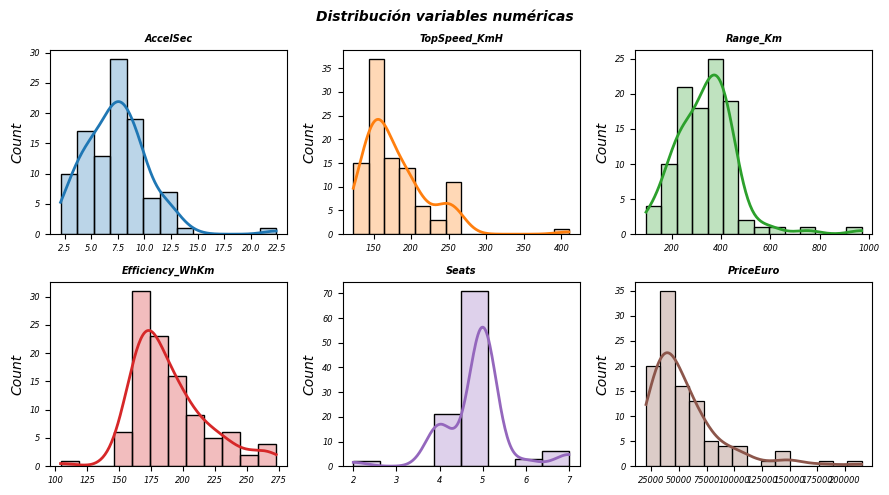

In [379]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_alternative_elec_clean.select_dtypes(include=['float64', 'int']).columns
# Check if 'string' is in columnas_numeric before dropping
if 'string' in columnas_numeric:
    columnas_numeric = columnas_numeric.drop('string')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = df_alternative_elec_clean,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold")

plt.show()

Datos de autos eléctricos, normales, conviene utilizar la clean, porque ya están convetidos sus valores para comparar.

**Suponiendo que los datos se refieren a vehículos eléctricos, esto es lo que probablemente representa cada columna para los modelos de automóviles:**

- AccelSec: Tiempo de aceleración de 0 a 100 kilómetros por hora (km/h), medido en segundos. Los valores más bajos indican una aceleración más rápida.

- TopSpeed_KmH: Velocidad máxima que puede alcanzar el vehículo, medida en kilómetros por hora.

- Range_Km: Autonomía del vehículo con una sola carga completa, medida en kilómetros. Los valores más altos indican una mayor autonomía.

- Efficiency_WhKm: Eficiencia energética del vehículo, medida en vatios-hora por kilómetro (Wh/km). Los valores más bajos indican una mejor eficiencia, lo que significa que el vehículo utiliza menos energía para recorrer una distancia determinada.

- Asientos: Número de asientos del vehículo.

- PriceEuro: Precio del vehículo en euros.

*Ejemplos:*

**Modelo A:** AccelSec: 4,5; TopSpeed_KmH: 200; Range_Km: 400; Efficiency_WhKm: 150; Seats: 5; PriceEuro: 35000.
Esto significa que el Modelo A puede acelerar de 0 a 100 km/h en 4,5 segundos, tiene una velocidad máxima de 200 km/h, puede recorrer 400 kilómetros con una sola carga, consume 150 Wh/km, tiene 5 plazas y cuesta 35.000 euros.

**Modelo B:** AccelSec: 7,0; TopSpeed_KmH: 160; Range_Km: 250; Efficiency_WhKm: 180; Seats: 4; PriceEuro: 28000.
Esto significa que el Modelo B acelera de 0 a 100 km/h en 7 segundos, tiene una velocidad máxima de 160 km/h, puede recorrer 250 kilómetros con una sola carga, consume 180 Wh/km, tiene 4 asientos y cuesta 28.000 euros.

Estas columnas proporcionan información valiosa para comparar el rendimiento, la eficiencia y el valor general de diferentes modelos de coches eléctricos.

In [380]:
# Assumiendo que el archivo está en la carpeta
# Cambiar al directorio con el archivo
file_path = "C:/Users/56988/Desktop/NYdrive/DATASETORIGEN/ElectricCarData_Norm.csv"
os.chdir("C:/Users/56988/Desktop/NYdrive/")

In [381]:
# Dataframe alternative fuel     28, 2 seg en abrir
df_alternative_elec_norm = pd.read_csv(file_path)

In [382]:
df_alternative_elec_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [383]:
df_alternative_elec_norm.head(2)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000


In [384]:
# Cantidad de valores nulos en cada columna
null_counts_alternative_elec_norm = df_alternative_elec_norm.isnull().sum()

In [385]:
null_counts_alternative_elec_norm

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

Archivo de taxi+zone+lookup:

In [386]:
# Assumiendo que el archivo está en la carpeta
# Cambiar al directorio con el archivo
file_path = "C:/Users/56988/Desktop/NYdrive/DATASETORIGEN/taxi+_zone_lookup.csv"
os.chdir("C:/Users/56988/Desktop/NYdrive/")

In [387]:
# Dataframe alternative fuel     28, 2 seg en abrir
df_taxi_zone = pd.read_csv(file_path)

In [388]:
df_taxi_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [389]:
df_taxi_zone["service_zone"].unique()

array(['EWR', 'Boro Zone', 'Yellow Zone', 'Airports', nan], dtype=object)

In [390]:
# Cantidad de valores nulos en cada columna
null_counts_taxi_zone = df_taxi_zone.isnull().sum()

In [391]:
null_counts_taxi_zone

LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64

Abrir archivo de metadata DATASETORIGEN\taxi_zones.dbf

In [392]:
# Abre el archivo DBF
dbf = DBF("DATASETORIGEN/taxi_zones.dbf")

# Convierte los datos a un DataFrame
df = DataFrame(iter(dbf))

In [393]:
# Ahora puedes trabajar con el DataFrame 'df'
df.head(2)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,0.116357,0.000782,Newark Airport,1,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    263 non-null    int64  
 1   Shape_Leng  263 non-null    float64
 2   Shape_Area  263 non-null    float64
 3   zone        263 non-null    object 
 4   LocationID  263 non-null    int64  
 5   borough     263 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 12.5+ KB


Probando hacer una gráfica con todos los datos de Taxis verdes de un mes (ENERO, 2024):

In [395]:
# datos de taxi 56 mil  df_verdes (taxis amarillos son de 3 millones) y df 263 df

# Unir los DataFrames
df_unido_verdes = pd.merge(df_verdes, df, left_on="PULocationID", right_on="LocationID")

In [396]:
df_unido_verdes.head(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,...,21.66,1.0,1.0,2.75,236,0.044252,0.000103,Upper East Side North,236,Manhattan
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,...,42.66,1.0,1.0,2.75,65,0.044607,0.000082,Downtown Brooklyn/MetroTech,65,Brooklyn


In [397]:
# entonces tengo una nueva data con VendorID, lpep_pickup_datetime,	lpep_dropoff_datetime, PULocationID, DOLocationID,
# trip_type, congestio_surcharge, Shape_Leng,	Shape_Area,	zone, LocationID,	borough
# Seleccionar las columnas deseadas
columnas_seleccionadas = ["VendorID", "lpep_pickup_datetime", "lpep_dropoff_datetime",
                        "PULocationID", "DOLocationID", "RatecodeID", "LocationID", 
                        "Shape_Leng", "Shape_Area", "zone", "borough", "store_and_fwd_flag", 
                        "passenger_count", "trip_distance", "trip_type", "congestion_surcharge",
                        "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", 
                        "ehail_fee", "improvement_surcharge", "total_amount", "payment_type", 
                        "trip_type", "congestion_surcharge"]

df_nuevo_mapa = df_unido_verdes[columnas_seleccionadas]

# Ahora df_nuevo contiene solo las columnas que quieres

In [398]:
df_nuevo_mapa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56444 entries, 0 to 56443
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56444 non-null  int32         
 1   lpep_pickup_datetime   56444 non-null  datetime64[us]
 2   lpep_dropoff_datetime  56444 non-null  datetime64[us]
 3   PULocationID           56444 non-null  int32         
 4   DOLocationID           56444 non-null  int32         
 5   RatecodeID             53031 non-null  float64       
 6   LocationID             56444 non-null  int64         
 7   Shape_Leng             56444 non-null  float64       
 8   Shape_Area             56444 non-null  float64       
 9   zone                   56444 non-null  object        
 10  borough                56444 non-null  object        
 11  store_and_fwd_flag     53031 non-null  object        
 12  passenger_count        53031 non-null  float64       
 13  t

In [399]:
# Reducción de la cantidad de datos para hacer el mapa
# Calcula el número de puntos a mostrar
#num_puntos_mostrar = int(0.07 * len(df_nuevo_mapa))

# Obtiene una muestra aleatoria del 7% de los datos
#muestra_aleatoria = df_nuevo_mapa.sample(num_puntos_mostrar, random_state=1, weights=None)

In [400]:
# Separar la fecha y hora de recogida de los taxis a sus pasajeros
df_nuevo_mapa["lpep_pickup_datetime"].unique()

<DatetimeArray>
['2024-01-01 00:46:55', '2024-01-01 00:31:42', '2024-01-01 00:30:21',
 '2024-01-01 00:30:20', '2024-01-01 00:32:38', '2024-01-01 00:43:41',
 '2024-01-01 00:31:56', '2024-01-01 00:46:12', '2024-01-01 00:38:07',
 '2024-01-01 00:44:24',
 ...
 '2024-01-31 18:32:52', '2024-01-31 18:19:00', '2024-01-31 19:23:00',
 '2024-01-31 19:14:00', '2024-01-31 19:41:00', '2024-01-31 20:46:00',
 '2024-01-31 21:06:00', '2024-01-31 21:36:00', '2024-01-31 22:45:00',
 '2024-01-31 22:28:00']
Length: 55145, dtype: datetime64[us]

In [401]:
# Supongamos que tienes un DataFrame 'df' con una columna 'fecha_hora'
# df['fecha_hora'] sería tu columna de fecha y hora

# Primero, asegúrate de que la columna esté en formato datetime
df_nuevo_mapa.loc[:, 'lpep_pickup_datetime'] = pd.to_datetime(df_nuevo_mapa["lpep_pickup_datetime"])

In [402]:
# Crea dos nuevas columnas para la fecha y la hora
df_nuevo_mapa.loc[:, 'fecha_pic'] = df_nuevo_mapa["lpep_pickup_datetime"].dt.date
df_nuevo_mapa.loc[:, 'hora_pic'] = df_nuevo_mapa["lpep_pickup_datetime"].dt.time

In [403]:
# DataFrame con año, mes y día separados
df_nuevo_mapa.loc[:, 'agno_pic'] = df_nuevo_mapa["lpep_pickup_datetime"].dt.year
df_nuevo_mapa.loc[:, 'mes_pic'] = df_nuevo_mapa["lpep_pickup_datetime"].dt.month
df_nuevo_mapa.loc[:, 'dia_pic'] = df_nuevo_mapa["lpep_pickup_datetime"].dt.day

In [404]:
# Crea una nueva columna 'hora_exacta' extrayendo la hora de la columna 'hora'
df_nuevo_mapa.loc[:, 'hora_exacta_pic'] = df_nuevo_mapa["hora_pic"].apply(lambda x: x.hour)

In [405]:
# Separar la fecha y hora de llegada de los taxis con sus pasajeros
df_nuevo_mapa["lpep_dropoff_datetime"].unique()

<DatetimeArray>
['2024-01-01 00:58:25', '2024-01-01 00:52:34', '2024-01-01 00:49:23',
 '2024-01-01 00:42:12', '2024-01-01 00:43:37', '2024-01-01 01:00:23',
 '2024-01-01 00:48:09', '2024-01-01 00:57:39', '2024-01-01 00:39:23',
 '2024-01-01 00:57:47',
 ...
 '2024-01-31 18:43:13', '2024-01-31 18:35:00', '2024-01-31 19:31:00',
 '2024-01-31 19:23:00', '2024-01-31 19:57:00', '2024-01-31 20:55:00',
 '2024-01-31 21:11:00', '2024-01-31 21:40:00', '2024-01-31 22:51:00',
 '2024-01-31 22:59:00']
Length: 55161, dtype: datetime64[us]

In [406]:
# Supongamos que tienes un DataFrame 'df' con una columna 'fecha_hora'
# df['fecha_hora'] sería tu columna de fecha y hora
# Primero, asegúrate de que la columna esté en formato datetime
df_nuevo_mapa.loc[:, 'lpep_dropoff_datetime'] = pd.to_datetime(df_nuevo_mapa["lpep_dropoff_datetime"])

In [407]:
# Crea dos nuevas columnas para la fecha y la hora
df_nuevo_mapa.loc[:, 'fecha_off'] = df_nuevo_mapa["lpep_dropoff_datetime"].dt.date
df_nuevo_mapa.loc[:, 'hora_off'] = df_nuevo_mapa["lpep_dropoff_datetime"].dt.time

In [408]:
# DataFrame con año, mes y día separados
df_nuevo_mapa.loc[:, 'agno_off'] = df_nuevo_mapa["lpep_dropoff_datetime"].dt.year
df_nuevo_mapa.loc[:, 'mes_off'] = df_nuevo_mapa["lpep_dropoff_datetime"].dt.month
df_nuevo_mapa.loc[:, 'dia_off'] = df_nuevo_mapa["lpep_dropoff_datetime"].dt.day

In [409]:
# Crea una nueva columna 'hora_exacta' extrayendo la hora de la columna 'hora'
df_nuevo_mapa.loc[:, 'hora_exacta_off'] = df_nuevo_mapa['hora_off'].apply(lambda x: x.hour)

In [410]:
# Ordenar columnas
df_nuevo_mapa = df_nuevo_mapa[["VendorID", "agno_pic", "mes_pic", "dia_pic", "hora_exacta_pic", "agno_off", "mes_off",
            "dia_off", "hora_exacta_off", "PULocationID", "DOLocationID", "RatecodeID", "LocationID", 
            "Shape_Leng", "Shape_Area", "zone", "borough", "store_and_fwd_flag", "passenger_count", 
            "trip_distance", "trip_type", "congestion_surcharge", "fare_amount", "extra", "mta_tax", 
            "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "payment_type"]]

In [411]:
# Contar los valores NaN de cada columna
nan_counts = df_nuevo_mapa.isnull().sum()

# Conseguir la suma total de NaNs
total_nan = nan_counts.sum()

# Mostrar la suma total de NaNs
print("Suma total de NaNs:", total_nan)

Suma total de NaNs: 27310


In [412]:
# Reemplazar los Nulos por 0s
df_nuevo_mapa.replace(np.nan, 0, inplace=True)

In [413]:
df_nuevo_mapa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56444 entries, 0 to 56443
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               56444 non-null  int32  
 1   agno_pic               56444 non-null  int32  
 2   mes_pic                56444 non-null  int32  
 3   dia_pic                56444 non-null  int32  
 4   hora_exacta_pic        56444 non-null  int64  
 5   agno_off               56444 non-null  int32  
 6   mes_off                56444 non-null  int32  
 7   dia_off                56444 non-null  int32  
 8   hora_exacta_off        56444 non-null  int64  
 9   PULocationID           56444 non-null  int32  
 10  DOLocationID           56444 non-null  int32  
 11  RatecodeID             56444 non-null  float64
 12  LocationID             56444 non-null  int64  
 13  Shape_Leng             56444 non-null  float64
 14  Shape_Area             56444 non-null  float64
 15  zo

In [414]:
df_nuevo_mapa.describe()

,VendorID,agno_pic,mes_pic,dia_pic,hora_exacta_pic,agno_off,mes_off,dia_off,hora_exacta_off,PULocationID,...,congestion_surcharge,congestion_surcharge,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type
count,56444.000000,56444.000000,56444.000000,56444.000000,56444.000000,56444.000000,56444.000000,56444.000000,56444.000000,56444.000000,...,56444.000000,56444.000000,56444.000000,56444.000000,56444.000000,56444.000000,56444.000000,56444.000000,56444.000000,56444.00000
mean,1.870509,2023.999965,1.000390,16.288463,13.795408,2023.999965,1.000656,16.287843,13.911966,95.633389,...,0.731304,0.731304,16.912102,0.901995,0.576877,2.255084,0.191046,0.985003,22.387249,1.24309
std,0.335746,0.005953,0.065478,8.885194,5.246437,0.005953,0.067475,8.885116,5.295923,57.311134,...,1.214828,1.214828,15.278908,1.345228,0.381317,2.842035,1.188227,0.139405,16.884352,0.57789
min,1.000000,2023.000000,1.000000,1.000000,0.000000,2023.000000,1.000000,1.000000,0.000000,1.000000,...,-2.750000,-2.750000,-70.000000,-5.000000,-0.500000,-1.660000,0.000000,-1.000000,-76.500000,0.00000
25%,2.000000,2024.000000,1.000000,9.000000,10.000000,2024.000000,1.000000,9.000000,10.000000,74.000000,...,0.000000,0.000000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,13.440000,1.00000
50%,2.000000,2024.000000,1.000000,17.000000,14.000000,2024.000000,1.000000,17.000000,15.000000,75.000000,...,0.000000,0.000000,13.500000,0.000000,0.500000,2.000000,0.000000,1.000000,18.430000,1.00000
75%,2.000000,2024.000000,1.000000,24.000000,18.000000,2024.000000,1.000000,24.000000,18.000000,97.000000,...,2.750000,2.750000,19.800000,2.500000,0.500000,3.500000,0.000000,1.000000,26.600000,2.00000
max,2.000000,2024.000000,12.000000,31.000000,23.000000,2024.000000,12.000000,31.000000,23.000000,263.000000,...,2.750000,2.750000,1422.600000,10.250000,4.250000,110.000000,24.050000,1.000000,1424.100000,5.00000


In [415]:
# Muestrea el 7% de los datos, al azar
df_muestra_tverdes = df_nuevo_mapa.sample(frac=0.07, random_state=1)

In [416]:
# Option 1: Convert infinity to NaN before operations
df_muestra_tverdes = df_muestra_tverdes.replace([np.inf, -np.inf], np.nan)  # Replace both positive and negative infinity

# Now you can use df for further analysis without the warning

In [417]:
data_array = df_muestra_tverdes["VendorID"].to_numpy()


In [418]:
data_array

array([1, 2, 2, ..., 1, 2, 2])

In [419]:
# Assuming you have a list of desired column names
desired_columns = ["VendorID", "agno_pic", "mes_pic", "dia_pic", "hora_exacta_pic", 
                                    "agno_off", "mes_off", "dia_off", "hora_exacta_off", "PULocationID", 
                                    "DOLocationID", "RatecodeID", "LocationID", "Shape_Leng", "Shape_Area", 
                                    "zone", "borough", "store_and_fwd_flag", "passenger_count", "trip_distance", 
                                    "trip_type", "congestion_surcharge", "fare_amount", "extra", "mta_tax", 
                                    "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "payment_type"]

data_array = df_muestra_tverdes[desired_columns]


In [420]:
numerical_columns = df_muestra_tverdes.select_dtypes(include=[np.number]).columns
categorical_columns = df_muestra_tverdes.select_dtypes(exclude=[np.number]).columns


<Axes: xlabel='VendorID', ylabel='Count'>

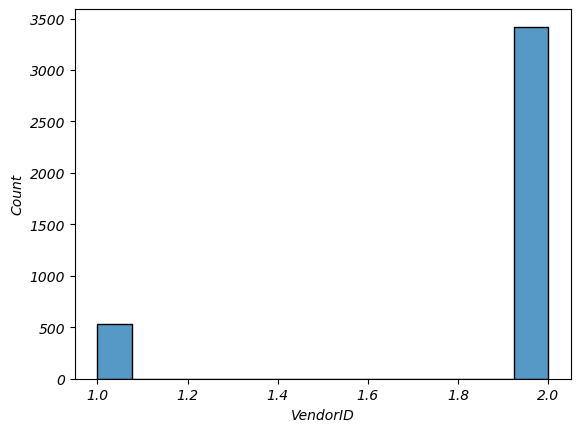

In [421]:
sns.histplot(data=df_muestra_tverdes, x="VendorID", stat="count")  # "count" for frequency

En VendorID, se muestra la frecuencia del proveedor de LPEP que proporcionó el registro. 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
Para la opción 2 es mucho más frecuente que la 1.

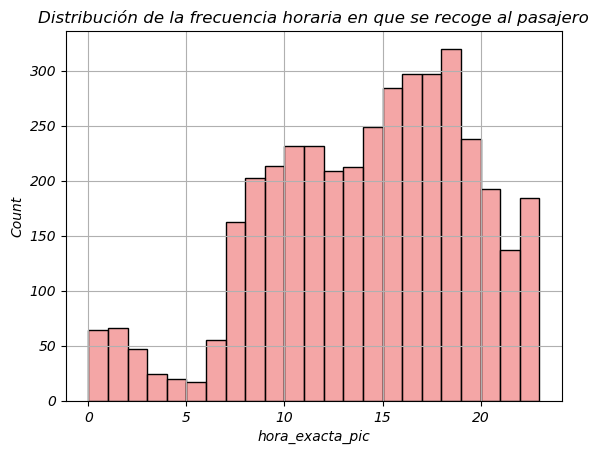

In [422]:
# Adjust histogram and trendline
sns.histplot(data=df_muestra_tverdes, x="hora_exacta_pic", stat="count", color="lightcoral", alpha=0.7, kde_kws=dict(line_on='add', color='black', linewidth=3))
plt.title("Distribución de la frecuencia horaria en que se recoge al pasajero")
plt.grid(True)
plt.show()

Acá se muestra la franja horaria en que se recoge al pasajero, activándose el taxímetro.

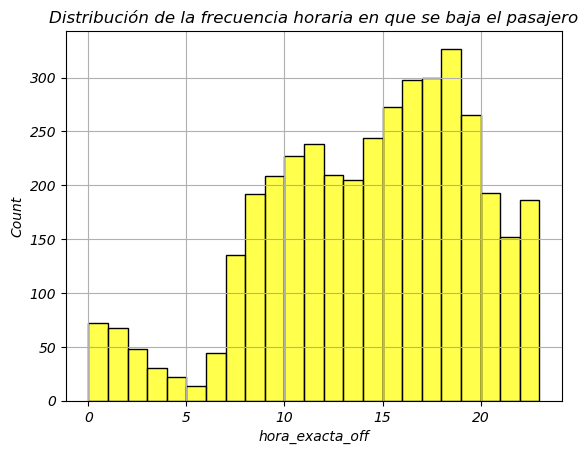

In [423]:
# Adjust histogram and trendline
sns.histplot(data=df_muestra_tverdes, x="hora_exacta_off", stat="count", color="yellow", alpha=0.7, kde_kws=dict(line_on='add', color='black', linewidth=3))
plt.title("Distribución de la frecuencia horaria en que se baja el pasajero")
plt.grid(True)
plt.show()

Poquísima diferencia para la franja horaria en que se baja el pasajero del taxi, desactivándose el taxímetro.

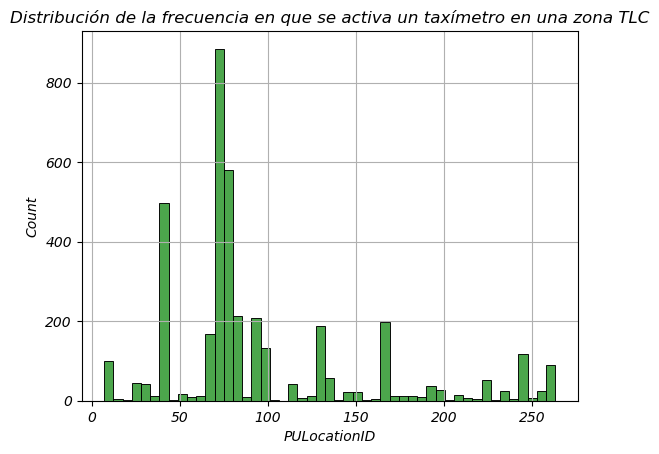

In [424]:
# Adjust histogram and trendline
sns.histplot(data=df_muestra_tverdes, x="PULocationID", stat="count", color="green", alpha=0.7, kde_kws=dict(line_on='add', color='black', linewidth=3))
plt.title("Distribución de la frecuencia en que se activa un taxímetro en una zona TLC")
plt.grid(True)
plt.show()

Frecuencia de la activación de taxímetro en Zona de taxis de TLC (Comisión de taxis y limusinas de la ciudad de Nueva York), 
es decir, se recogió a un pasajero en una zona determinada (equivale a un ID). 

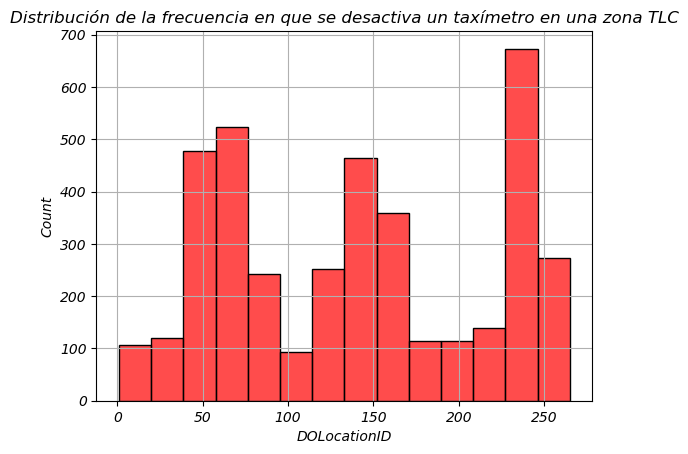

In [425]:
# Adjust histogram and trendline
sns.histplot(data=df_muestra_tverdes, x="DOLocationID", stat="count", color="red", alpha=0.7, kde_kws=dict(line_on='add', color='black', linewidth=3))
plt.title("Distribución de la frecuencia en que se desactiva un taxímetro en una zona TLC")
plt.grid(True)
plt.show()

Frecuencia de la desactivación de taxímetro en Zona de taxis de TLC (Comisión de taxis y limusinas de la ciudad de Nueva York), 
es decir, se bajó un pasajero en una zona determinada (equivale a un ID). 

In [426]:
# Verify data types (optional)
print(df_muestra_tverdes.dtypes)

VendorID                   int32
agno_pic                   int32
mes_pic                    int32
dia_pic                    int32
hora_exacta_pic            int64
agno_off                   int32
mes_off                    int32
dia_off                    int32
hora_exacta_off            int64
PULocationID               int32
DOLocationID               int32
RatecodeID               float64
LocationID                 int64
Shape_Leng               float64
Shape_Area               float64
zone                      object
borough                   object
store_and_fwd_flag        object
passenger_count          float64
trip_distance            float64
trip_type                float64
trip_type                float64
congestion_surcharge     float64
congestion_surcharge     float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amou

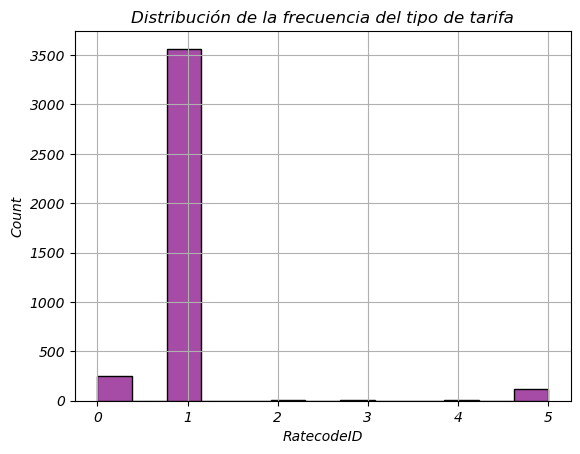

In [427]:
# Adjust histogram and trendline
sns.histplot(data=df_muestra_tverdes, x="RatecodeID", stat="count", color="purple", alpha=0.7, kde_kws=dict(line_on='add', color='black', linewidth=3))
plt.title("Distribución de la frecuencia del tipo de tarifa")
plt.grid(True)
plt.show()

Se muestra la frecuencia de las tarifas, el código ID que más se repite es el 1 (el código de tarifa final vigente al final del viaje. 1 = Tarifa estándar; 2 = JFK; 3 = Newark; 4 = Nassau o Westchester; 5 = Tarifa negociada; 6 = Viaje en grupo).

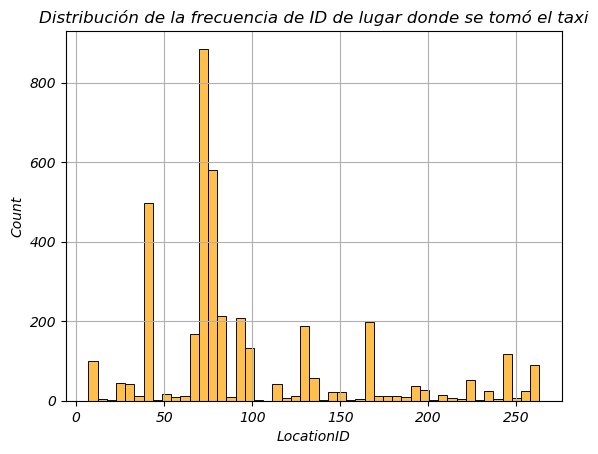

In [428]:
# Adjust histogram and trendline
sns.histplot(data=df_muestra_tverdes, x="LocationID", stat="count", color="orange", alpha=0.7, kde_kws=dict(line_on='add', color='black', linewidth=3))
plt.title("Distribución de la frecuencia de ID de lugar donde se tomó el taxi")
plt.grid(True)
plt.show()

En general, locationIDs son componentes esenciales del sistema de taxis de la ciudad de Nueva York, que contribuyen a precios justos, viajes eficientes y valiosa información de datos. Frecuencia de ID de zona o lugar donde se toma el viaje en taxi (verde).

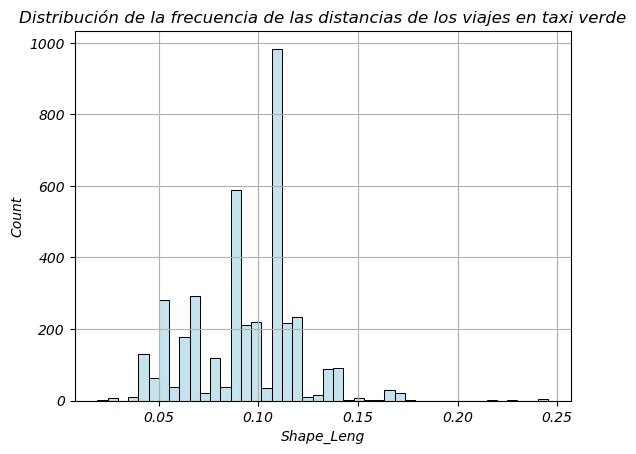

In [429]:
# Adjust histogram and trendline
sns.histplot(data=df_muestra_tverdes, x="Shape_Leng", stat="count", color="lightblue", alpha=0.7, kde_kws=dict(line_on='add', color='black', linewidth=3))
plt.title("Distribución de la frecuencia de las distancias de los viajes en taxi verde")
plt.grid(True)
plt.show()

Acá se puede ver la distribución de frecuencia de los viajes en taxi verde de cierta distancia (0,12 grados decimales)

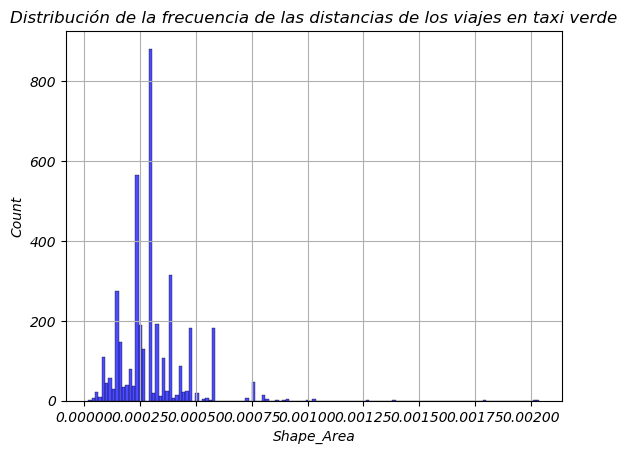

In [430]:
# Adjust histogram and trendline
sns.histplot(data=df_muestra_tverdes, x="Shape_Area", stat="count", color="blue", alpha=0.7, kde_kws=dict(line_on='add', color='black', linewidth=3))
plt.title("Distribución de la frecuencia de las distancias de los viajes en taxi verde")
plt.grid(True)
plt.show()

La columna Shape_Area probablemente represente el área de una zona geográfica específica asociada con cada viaje en taxi. Es muy probable que esta área se mida en metros cuadrados (m²). 0,0003 m², sería el área de la zona de tránsito de taxi verde que más se repite. NO ESTOY SEGURA

In [431]:
# Cuál es el valor máximo y el que más se repite en Shape_Area
max_value = df_muestra_tverdes["Shape_Area"].max()
most_frequent_value = df_muestra_tverdes["Shape_Area"].value_counts().idxmax()

print("Valor máximo:", max_value)
print("Valor más frecuente:", most_frequent_value)


Valor máximo: 0.00203830095472
Valor más frecuente: 0.000295038418204


Información geoespacial:
Componentes potenciales:

OBJECTIDShape_LengShape_Area: esta parte sugiere que podría estar relacionada con el identificador único de un objeto geográfico (ObjectID), sus propiedades de forma (posiblemente longitud - LengShape y área - Area) y posiblemente su información de zona (Area).

zoneLocationID: esto podría indicar un identificador de zona dentro de los datos.

borough: lo más probable es que se refiera a uno de los cinco distritos de la ciudad de Nueva York (Manhattan, Brooklyn, Queens, Staten Island o el Bronx). En este caso, se menciona "Queens".

Coordenadas: Los valores 010.1163570.000782 y 120.4334700.004866 pueden representar coordenadas de latitud y longitud en un formato específico (grados decimales).

Ubicaciones: "Newark Airport1EWR" y "Jamaica Bay2" pueden ser nombres de ubicaciones o etiquetas asociadas con las coordenadas. "1EWR" puede ser un identificador para el aeropuerto de Newark (EWR es un código de aeropuerto común).

Interpretación general:

Sin contexto sobre la fuente y el formato de los datos, es difícil proporcionar una interpretación definitiva. Sin embargo, aquí hay un posible escenario:

Esta cadena puede representar una sola entrada de datos de un conjunto de datos geoespaciales que contiene información sobre zonas, ubicaciones y, potencialmente, formas dentro de la ciudad de Nueva York.
La entrada puede ser para una zona en Queens (distrito) que incluye el aeropuerto de Newark (ubicación con código 1EWR) y Jamaica Bay (otra ubicación).
La zona puede tener un identificador único y los valores numéricos pueden representar propiedades como su área y la longitud de una forma específica dentro de la zona.
Consideraciones adicionales:

El formato específico y el significado de los datos dependen de la fuente. Consulta el diccionario de datos o la documentación asociada con el conjunto de datos para obtener una explicación clara de cada campo y su formato.
Si tienes la fuente de estos datos, puedes usarla para obtener una comprensión más precisa de lo que representa esta cadena.


OBJECTID Shape_Leng	Shape_Area	zone	     LocationID	  borough
0	1	0.116357	0.000782	Newark Airport	  1	      EWR
1	2	0.433470	0.004866	Jamaica Bay	      2	      Queens

No, los valores de la columna Shape_Leng (suponiendo que esa sea la longitud que te interesa) probablemente no estén en millas. Esta es la razón:

Origen de los datos: el fragmento de datos proporcionado menciona ubicaciones como "Aeropuerto de Newark" y "Bahía de Jamaica", lo que sugiere que está relacionado con la ciudad de Nueva York.
Unidades estándar: los datos geoespaciales en los EE. UU. suelen utilizar grados decimales o metros para representar ubicaciones y longitudes. Las millas son menos comunes para dichos datos.
Unidades posibles:

Grados decimales: si representan longitudes a lo largo de una línea geográfica, es probable que estén en grados decimales. Las distancias calculadas con estos valores necesitarían una conversión a una unidad lineal como metros o pies antes de convertirlas a millas.

Metros: también es posible que los valores representen directamente longitudes en metros. En este caso, podrías convertirlos a millas multiplicándolos por 0,000621371 (factor de conversión de metros a millas).

Cómo determinar las unidades:

Documentación de la fuente de datos: la mejor manera de confirmar las unidades es consultar la documentación o el diccionario de datos que acompaña al conjunto de datos que está utilizando. Debe especificar las unidades utilizadas para cada columna.
Pistas de contexto: a veces, los datos en sí mismos pueden ofrecer pistas. Por ejemplo, si otras columnas contienen distancias que se sabe que están en millas, es menos probable que Shape_Leng también esté en millas.
Recomendación:

Consulte la documentación de la fuente de datos para confirmar las unidades utilizadas en Shape_Leng.
Si las unidades no están en millas, deberá realizar una conversión de unidades antes de interpretarlas como longitudes en millas.

En el contexto del fragmento de datos proporcionado y el conjunto de datos de taxis ecológicos de Nueva York, la columna Shape_Area probablemente represente el área de una zona geográfica específica asociada con cada viaje en taxi. Es muy probable que esta área se mida en metros cuadrados (m²).

Justificación:

Datos relacionados con la zona: la presencia de columnas como zone y LocationID sugiere que los datos están relacionados con zonas o áreas geográficas.
Área vs. Longitud: Shape_Area es distinta de Shape_Leng, que probablemente representa la longitud. El área es una medida bidimensional, mientras que la longitud es unidimensional.
Taxis y zonas de Nueva York: los taxis ecológicos de Nueva York operan dentro de zonas específicas, y Shape_Area podría estar asociada con el área de estas zonas.
Interpretación:

Cada fila de los datos podría representar un viaje en taxi, y el valor Shape_Area para ese viaje podría ser el área de la zona donde se originó o finalizó el viaje.
El análisis de la distribución de los valores Shape_Area podría proporcionar información sobre el tamaño de las áreas donde los viajes en taxi ecológico son más comunes.
Visualización de histograma:

El fragmento de código proporcionado utiliza seaborn.histplot() para visualizar la distribución de los valores de Shape_Area mediante un histograma. Este es un enfoque adecuado para explorar la frecuencia de diferentes valores de área.

Consideraciones adicionales:

El significado específico de Shape_Area y su relevancia para los viajes en taxi dependen del contexto de la fuente de datos y del análisis que se esté realizando. Si la documentación de la fuente de datos no define explícitamente Shape_Area, es recomendable aclarar su significado con el proveedor de datos o investigar más a fondo para garantizar una interpretación precisa. Espero que esta explicación aclare el significado de Shape_Area y su posible función en el análisis de los datos de taxis ecológicos de Nueva York.

In [432]:

# Get the frequency counts of unique values in the 'zone' column
zone_counts = df_muestra_tverdes['zone'].value_counts()

# Sort the Series by counts in descending order (most frequent first)
top_20_zones = zone_counts.nlargest(20)

print("Top 20 Most Frequent Places in 'zone':")
print(top_20_zones)


Top 20 Most Frequent Places in 'zone':
zone
East Harlem North              876
East Harlem South              562
Central Park                   212
Central Harlem                 191
Elmhurst                       185
Morningside Heights            185
Forest Hills                   183
Fort Greene                    132
Downtown Brooklyn/MetroTech    109
Washington Heights South        98
Astoria                         97
Jackson Heights                 93
Central Harlem North            90
Jamaica                         88
Woodside                        83
Kew Gardens                     53
DUMBO/Vinegar Hill              50
Brooklyn Heights                35
Hamilton Heights                35
Steinway                        30
Name: count, dtype: int64


In [433]:
# Contar las zonas o lugares de NY
df_muestra_tverdes_with_counts = df_muestra_tverdes['zone'].value_counts().reset_index(name='count')

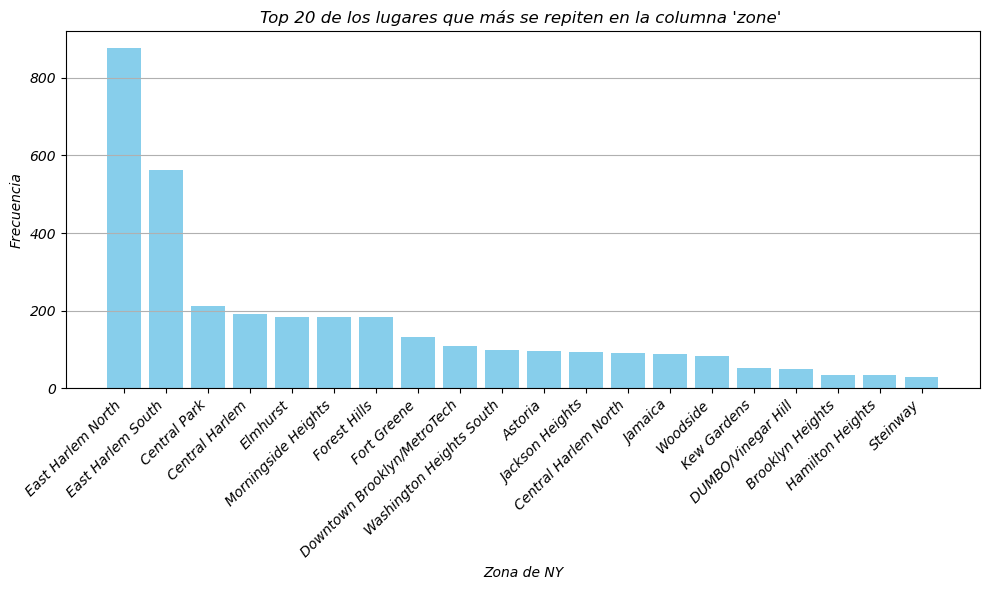

In [434]:
# Extracto de los 20 lugares que más se repiten en ZONE
zones = top_20_zones.index.to_list()
counts = top_20_zones.to_list()

# Crear el gráfico
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.bar(zones, counts, color='skyblue')

# Etiquetar ejes
plt.xlabel("Zona de NY")
plt.ylabel("Frecuencia")
plt.title("Top 20 de los lugares que más se repiten en la columna 'zone' ")

# Rotar un poco las etiquetas
plt.xticks(rotation=45, ha='right')

# Mostrar gráfica
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [435]:
# Cuál es el valor máximo y el que más se repite en Shape_Area
max_value = df_muestra_tverdes["zone"].max()
most_frequent_value = df_muestra_tverdes["zone"].value_counts().idxmax()

print("Valor máximo:", max_value)
print("Valor más frecuente:", most_frequent_value)


Valor máximo: Yorkville West
Valor más frecuente: East Harlem North


Los lugares que más se repiten entre los viajes en taxi verde en NY (top 20).

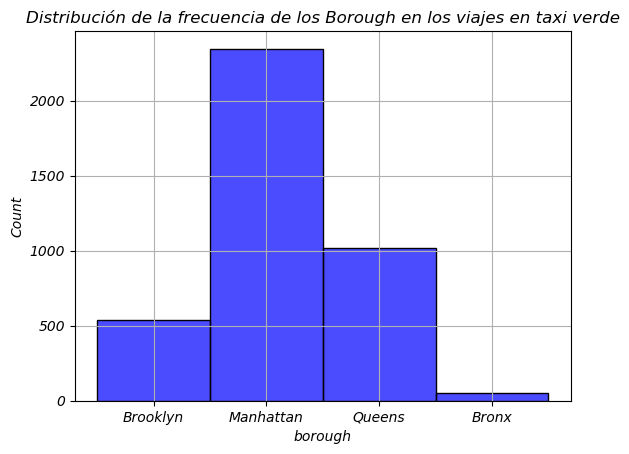

In [436]:
# Adjust histogram and trendline
sns.histplot(data=df_muestra_tverdes, x="borough", stat="count", color="blue", alpha=0.7, kde_kws=dict(line_on='add', color='black', linewidth=3))
plt.title("Distribución de la frecuencia de los Borough en los viajes en taxi verde")
plt.grid(True)
plt.show()

Los Borough más frecuentados en viaje de taxi verde, son Manhattan y Queens.

In [437]:
# Tipo de dato de la columna
print(df_muestra_tverdes["store_and_fwd_flag"].dtype)

object


In [438]:
# Cambiar N e Y por 0 y 1 en la columna
df_muestra_tverdes["store_and_fwd_flag"] = df_muestra_tverdes["store_and_fwd_flag"].replace(
    {0: 'N', 1: 'Y'})

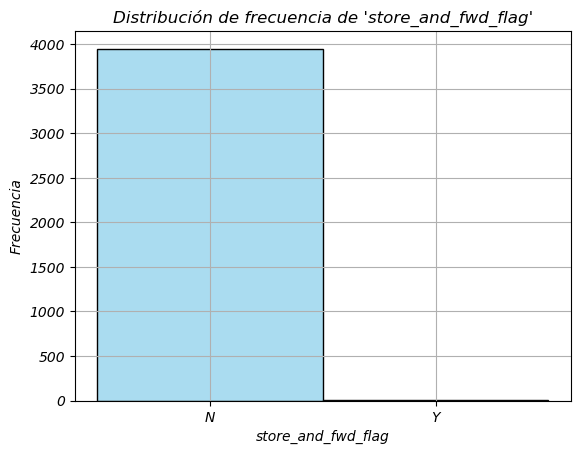

In [439]:
# Graficar la distribución de la frecuencia de los valores
sns.histplot(
    data=df_muestra_tverdes,
    x="store_and_fwd_flag",
    stat="count",
    color="skyblue",
    alpha=0.7,
    kde_kws=dict(line_on="add", color="black", linewidth=3),
)

plt.title("Distribución de frecuencia de 'store_and_fwd_flag'")
plt.xlabel("store_and_fwd_flag")
plt.ylabel("Frecuencia")

plt.grid(True)
plt.show()


Al parecer no se mantienen los registros en la memoria del taxi antes de enviarlo al proveedor de LPEP.
(Local Public Entity Program) para taxis verdes. Estos proveedores ofrecen una variedad de servicios para ayudar a las entidades públicas locales a cumplir con los requisitos del programa LPEP, que incluye la implementación de programas de transporte público, la mejora de la seguridad vial y la reducción del impacto ambiental del transporte.
The New York City Taxi and Limousine Commission (TLC) es un LPEP.
- **Store_and_fwd_flag:** Esta bandera indica si el registro del viaje se mantuvo en la memoria del vehículo antes de enviarlo al proveedor, también conocido como "almacenamiento y reenvío", porque el vehículo no tenía una conexión con el servidor. Y = viaje de almacenamiento y reenvío; N = no es un viaje de almacenamiento y reenvío.

**La gráfica indica que se envió directamente al servidor sin almacenamiento previo.**

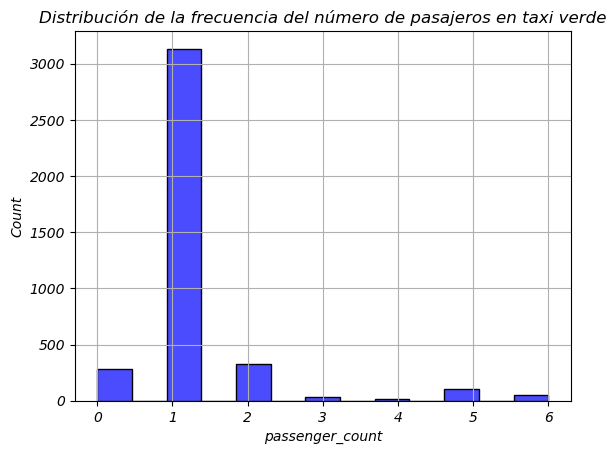

In [440]:
# Adjust histogram and trendline
sns.histplot(data=df_muestra_tverdes, x="passenger_count", stat="count", color="blue", alpha=0.7, kde_kws=dict(line_on='add', color='black', linewidth=3))
plt.title("Distribución de la frecuencia del número de pasajeros en taxi verde")
plt.grid(True)
plt.show()

Lo más frecuente es de a un pasajero.

In [441]:
# Descripción de las millas recorridas por los taxi verdes
df_muestra_tverdes["trip_distance"].describe()

count      3951.000000
mean         57.354333
std        3212.694792
min           0.000000
25%           1.120000
50%           1.810000
75%           3.110000
max      201421.680000
Name: trip_distance, dtype: float64

In [442]:
# Cuál es el valor máximo y las distancias en millas como valor máximo
max_value = df_muestra_tverdes["trip_distance"].max()
most_frequent_value = df_muestra_tverdes["trip_distance"].value_counts().idxmax()

print("Valor máximo:", max_value)
print("Valor más frecuente:", most_frequent_value)


Valor máximo: 201421.68
Valor más frecuente: 0.0


In [443]:
df_muestra_tverdes["trip_distance"].describe()

count      3951.000000
mean         57.354333
std        3212.694792
min           0.000000
25%           1.120000
50%           1.810000
75%           3.110000
max      201421.680000
Name: trip_distance, dtype: float64

En cuanto a distancia recorrida en el mes de ENERO del 2024, sumaron 201 421, 68 millas; con un promedio de 57, 3 millas por día
(con una desviación estándar +/- de 3 212,69 millas, lo cual es de mucha variabilidad respecto al promedio). Outlier.

In [444]:
df_muestra_tverdes["trip_type"].describe()

,trip_type,trip_type
count,3951.000000,3951.000000
mean,0.963554,0.963554
std,0.301369,0.301369
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,2.000000,2.000000


 Un código que indica si el viaje fue un viaje con conductor en la calle o un viaje con conductor que se asigna automáticamente en función de la tarifa medida en uso, pero que el conductor puede modificar. 1 = Viaje con conductor en la calle; 2 = Viaje con conductor.


In [445]:
if df_muestra_tverdes.index is None:
    df_muestra_tverdes = df_muestra_tverdes.reset_index(drop=True)


In [446]:
df_muestra_tverdes["congestion_surcharge"].describe()

,congestion_surcharge,congestion_surcharge
count,3951.000000,3951.000000
mean,0.725892,0.725892
std,1.211510,1.211510
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.750000,2.750000
max,2.750000,2.750000


In [447]:
df_muestra_tverdes["fare_amount"].describe()

count    3951.000000
mean       17.389995
std        15.575752
min        -5.800000
25%         9.300000
50%        13.500000
75%        19.800000
max       400.000000
Name: fare_amount, dtype: float64

In [448]:
df_muestra_tverdes["extra"].describe()

count    3951.000000
mean        0.879461
std         1.338846
min        -2.500000
25%         0.000000
50%         0.000000
75%         1.000000
max         7.500000
Name: extra, dtype: float64

In [449]:
df_muestra_tverdes["mta_tax"].describe()

count    3951.000000
mean        0.578904
std         0.387777
min        -0.500000
25%         0.500000
50%         0.500000
75%         0.500000
max         4.250000
Name: mta_tax, dtype: float64

In [450]:
df_muestra_tverdes["tip_amount"].describe()

count    3951.000000
mean        2.267689
std         2.922249
min        -0.010000
25%         0.000000
50%         2.000000
75%         3.500000
max        56.000000
Name: tip_amount, dtype: float64

In [451]:
df_muestra_tverdes["tolls_amount"].describe()

count    3951.000000
mean        0.196603
std         1.221540
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.320000
Name: tolls_amount, dtype: float64

In [452]:
df_muestra_tverdes["improvement_surcharge"].describe()

count    3951.000000
mean        0.982637
std         0.143738
min        -1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: improvement_surcharge, dtype: float64

In [453]:
df_muestra_tverdes["total_amount"].describe()

count    3951.000000
mean       22.849960
std        17.292685
min        -8.400000
25%        13.600000
50%        18.750000
75%        26.920000
max       401.000000
Name: total_amount, dtype: float64

In [454]:
df_muestra_tverdes["payment_type"].describe()

count    3951.000000
mean        1.237914
std         0.581652
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: payment_type, dtype: float64

In [455]:
# Agrupación para seleccionar datos sin nulo
# #tabla1["fecha"] = tabla1["tpep_pickup_datetime"].dt.date
#tabla_agrupada1 = tabla1.groupby(["fecha","VendorID","store_and_fwd_flag","payment_type","RatecodeID","PULocationID","DOLocationID"]).sum().reset_index()

In [456]:
#df_numeric = df.copy()  # Create a copy to avoid modifying the original DataFrame
#df_numeric["column1"] = df_numeric["column1"].astype(int)
#df_numeric["column2"] = df_numeric["column2"].astype(float)


In [457]:
# Crea el mapa base
#m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Agrega marcadores para la recogida
#for index, row in muestra_aleatoria.iterrows():
#    folium.Marker(
#        [row["PULocationID"], row["DOLocationID"]],
#        popup=f"Pickup: {row['zone']}",
#        icon=folium.Icon(color="green"),
#    ).add_to(m)

# Agrega marcadores para la entrega
#for index, row in muestra_aleatoria.iterrows():
#    folium.Marker(
#        [row["PULocationID"], row["DOLocationID"]],
#        popup=f"Dropoff: {row['zone']}",
#        icon=folium.Icon(color="red"),
#    ).add_to(m)

# Guarda el mapa en un archivo HTML
#m.save("mapa_viajes_taxi_muestra.html")

# (Opcional) Muestra el mapa en un IFrame
#from IPython.display import IFrame

#IFrame(src="mapa_viajes_taxi_muestra.html", width=700, height=600)


In [458]:
#from IPython.display import IFrame

#iframe = IFrame(src='mapa_viajes_taxi.html', width=700, height=600)


In [459]:
#iframe

In [460]:
# Cantidad de valores nulos en cada columna
null_counts_metadata = df.isnull().sum()

In [461]:
null_counts_metadata

OBJECTID      0
Shape_Leng    0
Shape_Area    0
zone          0
LocationID    0
borough       0
dtype: int64

Data vehicle fuel economy:

In [462]:
# Assumiendo que el archivo está en la carpeta
# Cambiar al directorio con el archivo
file_path = "C:/Users/56988/Desktop/NYdrive/DATASETORIGEN/Vehicle Fuel Economy Data.csv"
os.chdir("C:/Users/56988/Desktop/NYdrive/")

In [463]:
# Dataframe alternative fuel     28, 2 seg en abrir
df_vehicle_fuel_econo = pd.read_csv(file_path)

In [464]:
df_vehicle_fuel_econo.head(2)

,Year,Manufacturer,Model,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,2017,BMW,M6 Coupe,17.500588,0.0,0.0,15.0,14.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,09-09-2016,Y,0.0,0.0,0.0
1,2017,BMW,X3 sDrive28i,12.396250,0.0,0.0,21.0,21.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,22-11-2016,Y,0.0,0.0,0.0


In [465]:
df_vehicle_fuel_econo.columns

Index(['Year', 'Manufacturer', 'Model', 'barrels08', 'barrelsA08', 'charge240',
       'city08', 'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF',
       'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'VClass',
       'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4',
       'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'youSaveSpend', 'guzzler', 'trans_dscr',
       'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor',
       'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr', 'createdOn',
       'modifiedOn', 's

- ‘Year’: El año de fabricación del vehículo.
- ‘Manufacturer’: El fabricante o marca del vehículo.
- ‘Model’: El modelo específico del vehículo.
- ‘barrels08’: Consumo de barriles de combustible por cada 100 millas en ciudad.
- ‘co2TailpipeGpm’: Emisiones de CO2 en gramos por milla.
- ‘comb08’: Consumo combinado de combustible en ciudad y carretera.
- ‘cylinders’: Número de cilindros en el motor.
- ‘displ’: Desplazamiento del motor en litros.
- ‘drive’: Tipo de tracción (por ejemplo, tracción delantera o trasera).
- ‘VClass’: Clase de vehículo (por ejemplo, compacto, SUV, etc.).
- ‘highway08’: Consumo de combustible en carretera.
- ‘UCity’: Consumo de combustible urbano ajustado.
- ‘youSaveSpend’: Ahorro o gasto estimado en combustible en comparación con un vehículo promedio.
- ‘trans_dscr’: Descripción de la transmisión (por ejemplo, automática, manual).
- ‘startStop’: Indica si el vehículo tiene una función de parada y arranque automático del motor.


In [466]:
# Cantidad de valores nulos en cada columna
null_counts_veh_fuel_econo = df_vehicle_fuel_econo.isnull().sum()

In [467]:
null_counts_veh_fuel_econo

Year                0
Manufacturer        0
Model              10
barrels08          17
barrelsA08         17
                ...  
modifiedOn       2016
startStop       31829
phevCity         2016
phevHwy          2016
phevComb         2016
Length: 82, dtype: int64